<a href="https://colab.research.google.com/github/MrBCPT/Prediction-of-Product-Sales/blob/main/Project1_Part4_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 4 (Core)

- Student Name: Satish Byrow


### Univariate EDA Functions

In [121]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


### Multivariate Feature vs. Target Functions.

In [122]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Import Packages and Load Data

In [123]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [124]:
## from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

# load data
path = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(path)
df.info()
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Fix the data to Orginal state

In [125]:
#Replace -1 with Null
df["Item_Weight"] = df["Item_Weight"].replace(-1, np.NaN)
df["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [126]:
#Replace "MISSING" with null, however in this case the df already has NaN
#df["Outlet_Size"] = df["Outlet_Size"].replace("MISSING", np.NaN, inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [127]:
#Check for null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Interpretation:** null values are in place

Defined Target: Item_Outlet_Sales
Identified as a regression Task

#Data Dictionary for this dataset:

Variable Name	Description<br>
Item_Identifier	Product ID<br>
Item_Weight	Weight of product<br>
Item_Fat_Content	Whether the product is low-fat or regular<br>
Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product<br>
Item_Type	The category to which the product belongs<br>
Item_MRP	Maximum Retail Price (list price) of the product
Outlet_Identifier	Store ID<br>
Outlet_Establishment_Year	The year in which store was established<br>
Outlet_Size	The size of the store in terms of ground area covered<br>
Outlet_Location_Type	The type of area in which the store is located<br>
Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket<br>
Item_Outlet_Sales	Sales of the product in the particular store. This is the target variable to be predicted.<br>


##Feature list and Inspection:

Item_Weight<br>
Item_Fat_Content<br>
Item_Visibility<br>
Item_Type<br>
Item_MRP<br>
Outlet_Identifier<br>
Outlet_Establishment_Year<br>
Outlet_Size<br>
Outlet_Location_Type<br>
Outlet_Type<br>


### Feature Name: Item_Weight : Weight of product

In [128]:
#Confirming the dtype to select correct EDA function
feature = "Item_Weight"
target = "Item_Outlet_Sales"

df[feature].dtype

dtype('float64')

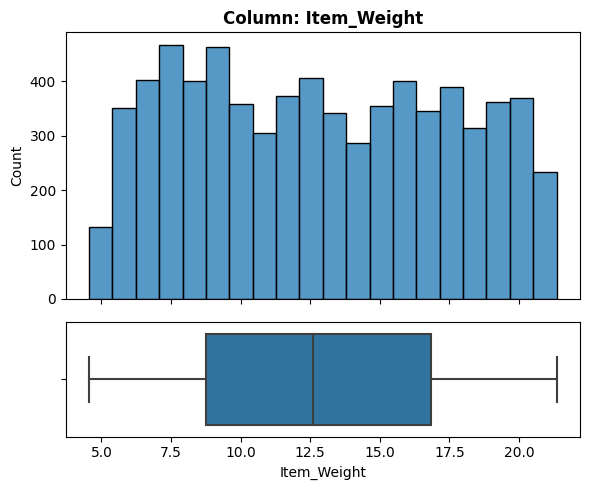

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [129]:
#Numerical field
explore_numeric(df, feature, figsize=(6,5) )

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...1463 null values (17.17%). Input with Mean or median

3. Is the feature constant or quasi-constant?
  - ...No

4. What is the cardinality? Is it high?
  - ...cardinality does not apply to numeric

5. Would we know this feature BEFORE the target is determined?
  - ...No

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...No, weight could still determine sales.

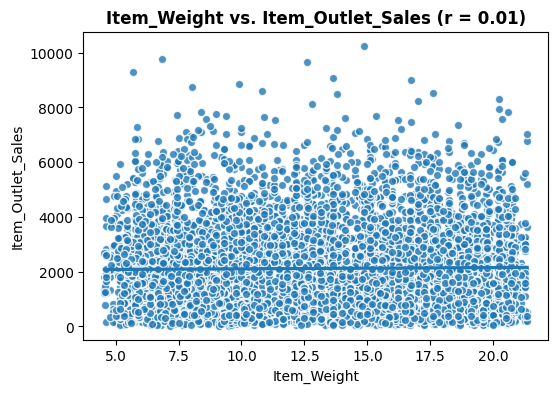

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [130]:
#Multivariate based on target
plot_numeric_vs_target(df,feature, target)

**Feature vs. Target Observations**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...` Yes
  - Does this feature appear to be a predictor of the target?
    - `...` No

### Feature Name: Item_Fat_Content : Whether the product is low-fat or regular

In [131]:
#Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
target = "Item_Outlet_Sales"

df[feature].dtype

dtype('O')

In [132]:
#Check column names
df[feature].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [133]:
#Fix Column names
feature_content_map = {'LF':'Low Fat',
                       'reg':'Regular',
                       'low fat':'Low Fat'}

df[feature] = df[feature].replace(feature_content_map)

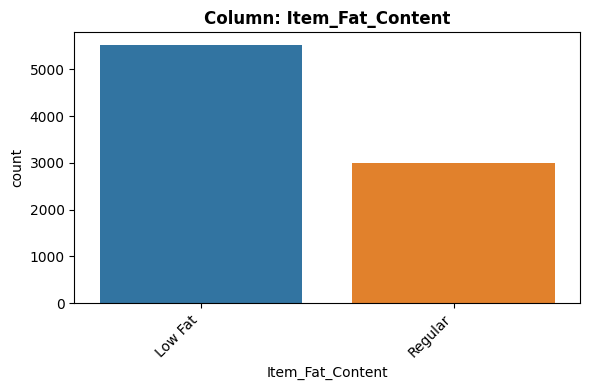

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [134]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, "Item_Fat_Content")

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...0 null values (0%).

3. Is the feature constant or quasi-constant?
  - ...No

4. What is the cardinality? Is it high?
  - ...No, not more than 10 therefore not high

5. Would we know this BEFORE the target is determined?
  - ...Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...No, the amount of sales based on Fat content can be a determining factor



(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

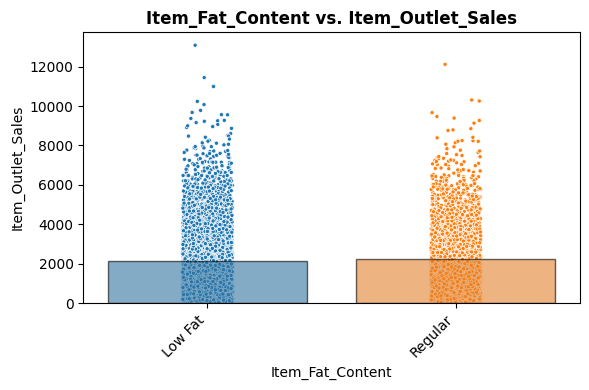

In [135]:
#Check multivariate
plot_categorical_vs_target(df, feature, target)

**Feature vs. Target Observations:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...` Yes
  - Does this feature appear to be a predictor of the target?
    - `...` Yes, there are more Sales for a low fat


### Feature Name: Item_Visibility : The percentage of total display area of all products in a store allocated to the particular product

In [136]:
#Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
target = "Item_Outlet_Sales"

df[feature].dtype

dtype('float64')

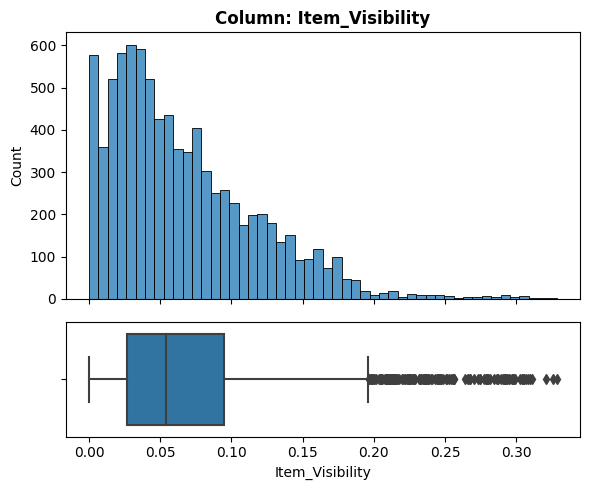

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [137]:
#Numerical field
explore_numeric(df, feature, figsize=(6,5) )

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...0 null values (0.0%).

3. Is the feature constant or quasi-constant?
  - ...No

4. What is the cardinality? Is it high?
  - ...cardinality does not apply to numeric

5. Would we know this feature BEFORE the target is determined?
  - ...Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...No, the visibility could still determine sales quantity.

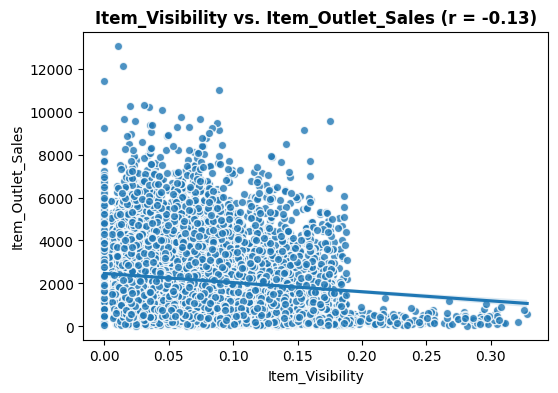

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [138]:
#Multivariate based on target
plot_numeric_vs_target(df,feature, target)

**Feature vs. Target Observations:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...` Yes
  - Does this feature appear to be a predictor of the target?
    - `...` No

### Feature Name: Item_Type : The category to which the product belongs

In [139]:
#Confirming the dtype to select correct EDA function
feature = "Item_Type"
target = "Item_Outlet_Sales"

df[feature].dtype

dtype('O')

In [140]:
#Check column names
df[feature].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

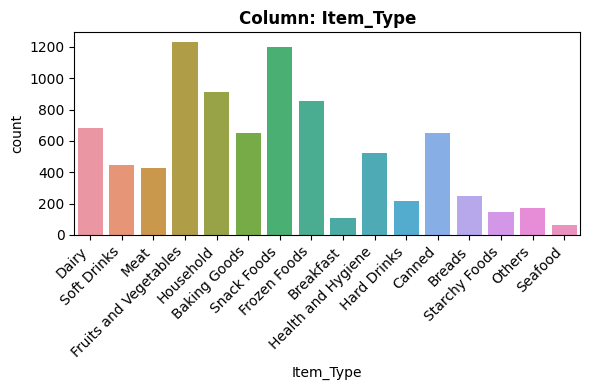

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [141]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...0 null values (0%).

3. Is the feature constant or quasi-constant?
  - ...No

4. What is the cardinality? Is it high?
  - ...Yes, more than 10 therefore high

5. Would we know this feature BEFORE the target is determined?
  - ...Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...No, the amount of sales based on category can be a determining factor



(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

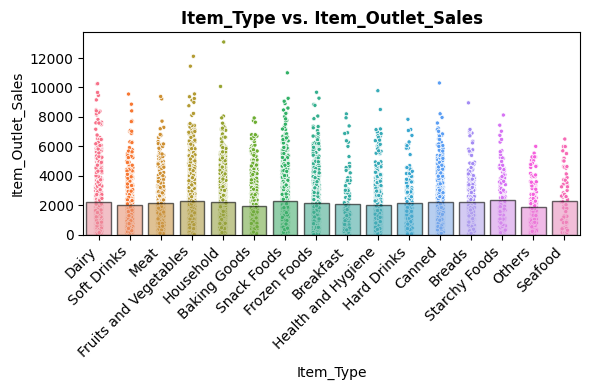

In [142]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, target)

**Feature vs. Target Observations:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...` Yes
  - Does this feature appear to be a predictor of the target?
    - `...` Yes, there are more sales for a popular types

___

### Feature Name: Item_MRP : Item_MRP Maximum Retail Price (list price) of the product Outlet_Identifier Store ID

In [143]:
#Confirming the dtype to select correct EDA function
feature = "Item_MRP"
target = "Item_Outlet_Sales"

df[feature].dtype

dtype('float64')

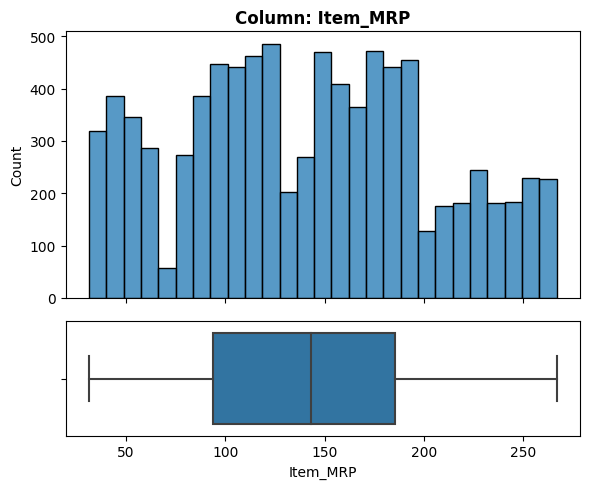

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [144]:
#Numerical field
explore_numeric(df, feature, figsize=(6,5) )

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...0 null values (0.0%).

3. Is the feature constant or quasi-constant?
  - ...No

4. What is the cardinality? Is it high?
  - ...cardinality does not apply to numeric

5. Would we know this feature BEFORE the target is determined?
  - ...Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...No, retail price could still determine sales.

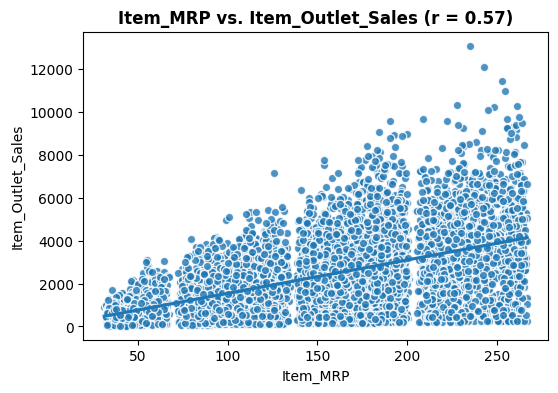

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [145]:
#Multivariate based on target
plot_numeric_vs_target(df,feature, target)

**Feature vs. Target Observations**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...` Yes
  - Does this feature appear to be a predictor of the target?
    - `...` Yes

### Feature Name: Outlet_Establishment_Year: The year in which store was established

In [146]:
#Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
target = "Item_Outlet_Sales"

df[feature].dtype

dtype('int64')

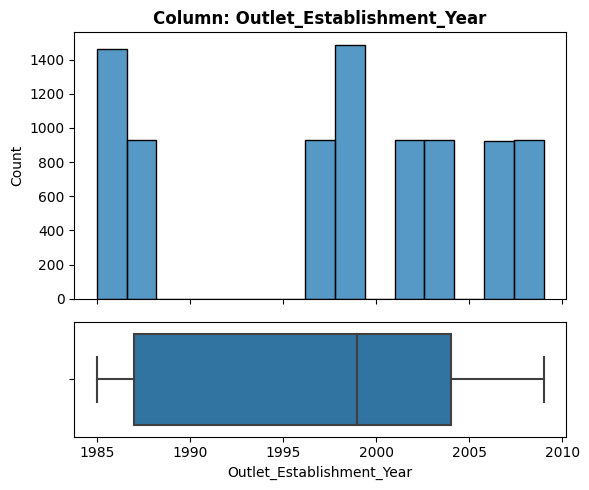

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year', ylabel='Count'>,
        <Axes: xlabel='Outlet_Establishment_Year'>], dtype=object))

In [147]:
#Numerical field
explore_numeric(df, feature, figsize=(6,5) )

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...0 null values (0.0%).

3. Is the feature constant or quasi-constant?
  - ...No

4. What is the cardinality? Is it high?
  - ...cardinality does not apply to numeric

5. Would we know this feature BEFORE the target is determined?
  - ...Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...No, Well established Outlets could have more sales.

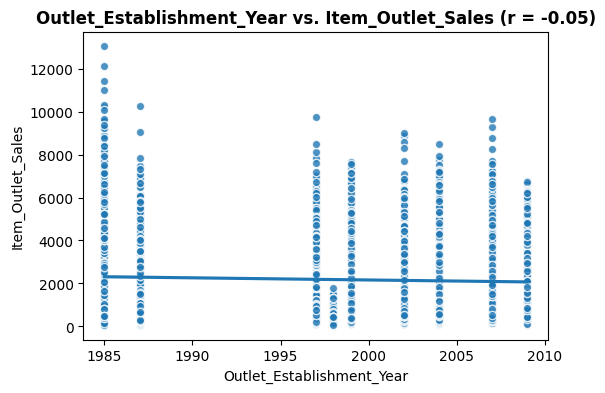

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales (r = -0.05)'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

In [148]:
#Multivariate based on target
plot_numeric_vs_target(df,feature, target)

**Feature vs. Target Observations**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...` Yes
  - Does this feature appear to be a predictor of the target?
    - `...` Yes

### Feature Name: Outlet_Size: The size of the store in terms of ground area covered

In [149]:
#Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
target = "Item_Outlet_Sales"

df[feature].dtype

dtype('O')

In [150]:
#Check column names
df[feature].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

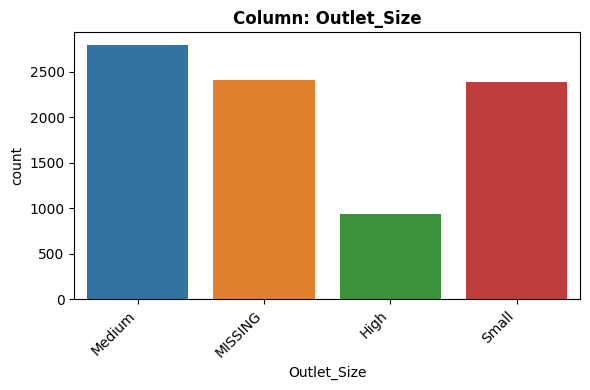

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [151]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...2410 null values (28.28%). Impute High and MISSING to indicate Large

3. Is the feature constant or quasi-constant?
  - ...No

4. What is the cardinality? Is it high?
  - ...4, low

5. Would we know this feature BEFORE the target is determined?
  - ...Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...No, the amount of sales based on size of outlet can be a determining factor



(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

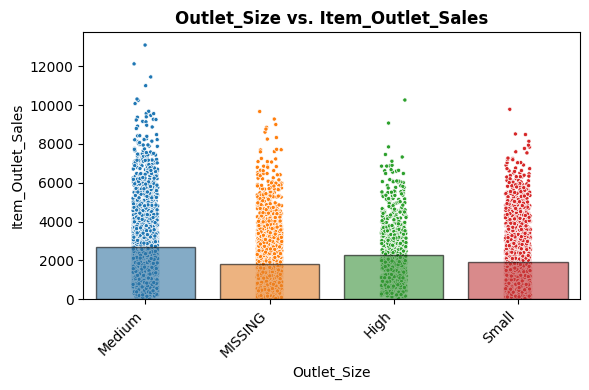

In [152]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, target)

**Feature vs. Target Observations:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...` Yes
  - Does this feature appear to be a predictor of the target?
    - `...` No, there are more sales medium sized outlets

___

### Feature Name: Outlet_Location_Type: The type of area in which the store is located

In [153]:
#Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
target = "Item_Outlet_Sales"

df[feature].dtype

dtype('O')

In [154]:
#Check column names
df[feature].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

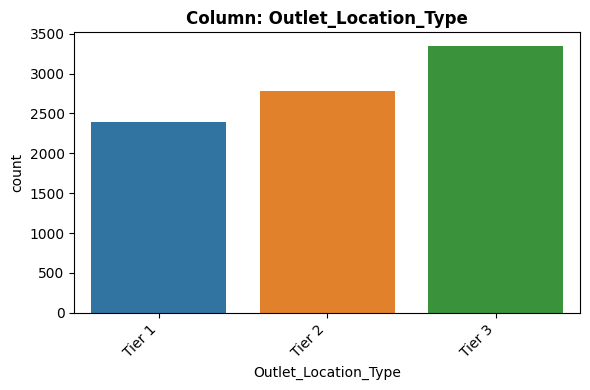

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [155]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature, order = ['Tier 1','Tier 2','Tier 3'])

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...0 null values (0%).

3. Is the feature constant or quasi-constant?
  - ...No

4. What is the cardinality? Is it high?
  - ...No

5. Would we know this feature BEFORE the target is determined?
  - ...Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...No, the amount of sales based on location can be a determining factor



(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

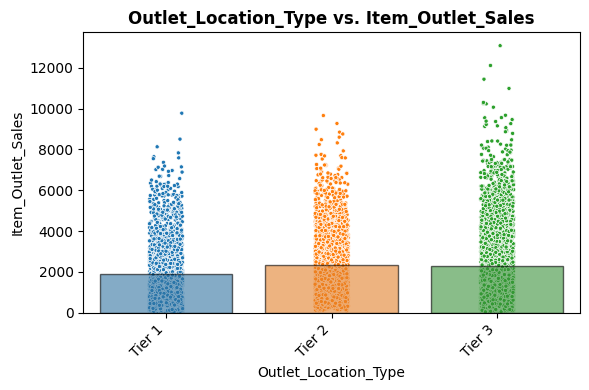

In [156]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, target,order = ['Tier 1','Tier 2','Tier 3'])

**Feature vs. Target Observations:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...` Yes
  - Does this feature appear to be a predictor of the target?
    - `...` Yes, there are more sales for a higher income areas that are in better lcoations

___

### Feature Name: Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket

In [157]:
#Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
target = "Item_Outlet_Sales"

df[feature].dtype

dtype('O')

In [158]:
#Check column names
df[feature].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

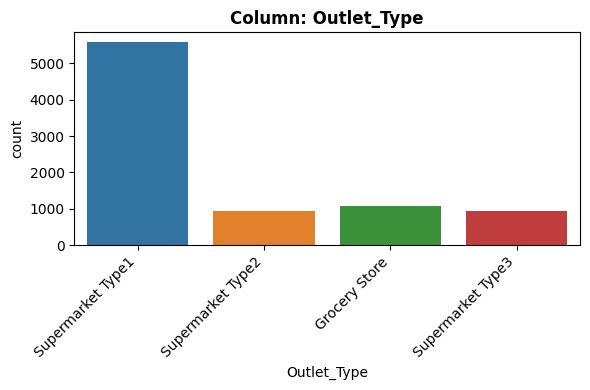

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [159]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...0 null values (0.0%).

3. Is the feature constant or quasi-constant?
  - ...No

4. What is the cardinality? Is it high?
  - ...cardinality is low

5. Would we know this feature BEFORE the target is determined?
  - ...Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...No, the supermarket type is delirectly related to sales amount.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

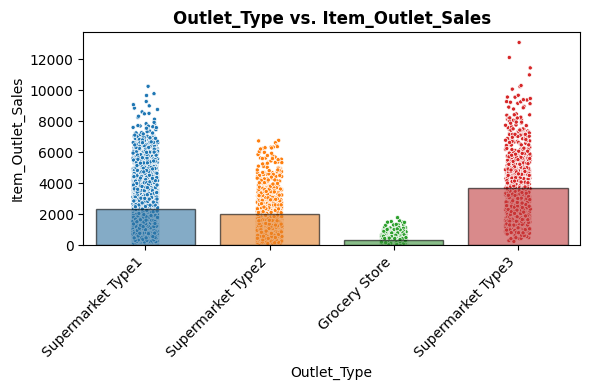

In [160]:
#Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, target)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...` Yes
  - Does this feature appear to be a predictor of the target?
    - `...` Yes, Type 3 has more sales due to it's type of store